In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import os
import time
from tqdm.notebook import tqdm_notebook
import copy
import pickle

from pomcp import POMCP
import pomcp_run_functions as prf
import parameters as pars
import environment as env
import visualization as vis

In [3]:
msrmnt_err = 50
P = pars.PARS(msrmnt_err)

In [16]:
msrmnt_err = 50
P = pars.PARS(msrmnt_err)

pomcp_params = {'floor_quantile': 0.1,
                'ceil_quantile': 0.8,
                'n_obs_buckets': 10,
                'n_pomcp_runs': 100,
                'n_rollout_runs': 3500}

# initialize A with random observation
A = POMCP(P, initial_observation=-140, **pomcp_params)

In [ ]:
A = POMCP(P, initial_observation=-140, **pomcp_params)
A.Search(time=1)

In [84]:
a,b,c,d = prf.get_bounds_by_quantiles(0.001, 0.9, 0.001, 0.999, P)
db, kb, d, k = prf.get_belief_buckets(100,100, a,b,c,d)
D_outer, K_outer, D_mid, K_mid = prf.get_belief_grids(db, kb, d, k)

In [ ]:
a = time.time()
Z = prf.belief_trier(D_mid, K_mid, A, P, t=20, parallel=True)
print(time.time()-a)

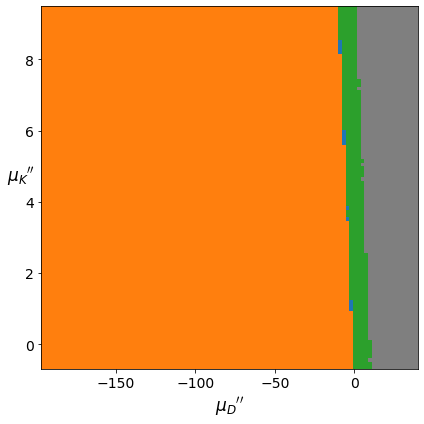

In [87]:
colormap = 'custom'
vis.belief_grid_visualization(D_outer, K_outer, Z, colormap, plot_cbar=True, save=False)

In [52]:
with open('./belief_Z_sigma_50_t_1.pkl', 'rb') as f:
    Y = pickle.load(f)

In [4]:
msrmnt_err = 0.5
P = pars.PARS(msrmnt_err)

In [ ]:
n = 100

test = 'rollout_runs'

if test == 'rollout_runs':
    pomcp_run_vec = [10, 100, 1000]
    rollout_run_vec = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000]
    mrt_list = list()
    crt_list = list()
    mtt_list = list()
    ctt_list = list()
    for p in pomcp_run_vec:
        mrt, crt, mtt, ctt = prf.rollout_timer(rollout_run_vec=rollout_run_vec, n=n, P=P, pomcp_runs=p, plot=False)
        mrt_list.append(mrt)
        crt_list.append(crt)
        mtt_list.append(mtt)
        ctt_list.append(ctt)

        
elif test == 'pomcp_runs':
    pomcp_run_vec = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]
    rollout_run_vec = [10, 100, 1000]
    mt_list = list()
    ct_list = list()
    for r in rollout_run_vec:
        mt, ct = prf.pomcp_timer(pomcp_run_vec=pomcp_run_vec, n=n, P=P, rollout_runs=r, plot=False)
        mt_list.append(mt)
        ct_list.append(ct)    
    
else:
    raise RuntimeError("Choose either 'rollout_runs' or 'pomcp_runs'")

